# Họ và Tên Nguyễn Minh Khôi
# MSSV: 207ct28031

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng median filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Sobel filter để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi thứ tự các kênh màu (ví dụ: BGR → GRB hoặc GBR...) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu LAB và tách riêng 3 kênh L, A, B, lưu thành ảnh grayscale tương ứng (`[ten_anh]_L.jpg`, `[ten_anh]_A.jpg`, `[ten_anh]_B.jpg`). (0.5 điểm)


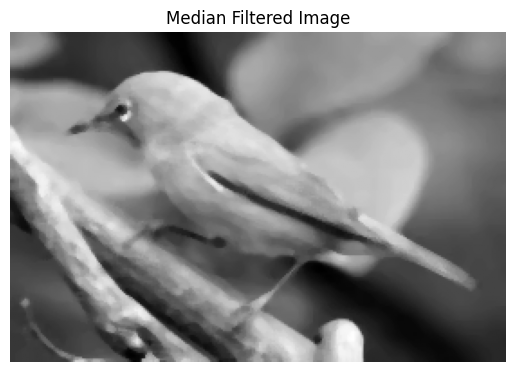

In [ ]:
# Viết chương trình sử dụng median filter để làm mịn ảnh. (0.5 điểm)
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
from PIL import Image

# mở ảnh và chuyển sang grayscale
img = Image.open('bird.jpg').convert('L')
a = np.array(img)

# áp dụng bộ lọc median
b = sn.median_filter(a, size=5, footprint=None, output=None,
                     mode='reflect', cval=0.0, origin=0)

# lưu ảnh kết quả
iio.imsave('bird_median_filter.jpg', b)

# hiển thị ảnh
plt.imshow(b, cmap='gray')
plt.title("Median Filtered Image")
plt.axis('off')
plt.show()


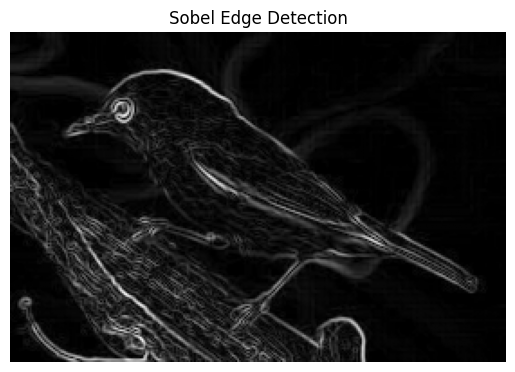

In [ ]:
#Viết chương trình sử dụng Sobel filter để xác định biên của hình ảnh. (0.5 điểm) 
import numpy as np
from PIL import Image
import imageio.v2 as iio
from skimage import filters
import matplotlib.pyplot as plt

# mở ảnh và chuyển sang ảnh xám
img = Image.open('bird.jpg').convert('L')
a = np.array(img)

# áp dụng Sobel filter
b = filters.sobel(a)

# chuẩn hóa ảnh Sobel sang [0, 255] và chuyển về uint8
b = (b * 255).astype(np.uint8)

# lưu và hiển thị ảnh kết quả
iio.imsave('bird_sobel_filter_edge_detection.png', b)
plt.imshow(b, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()


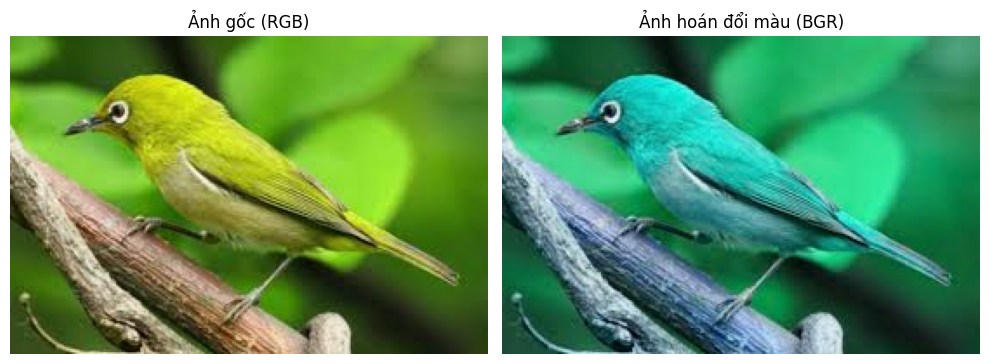

In [7]:
# Đổi màu ảnh bằng cách hoán đổi thứ tự các kênh màu (ví dụ: BGR → GRB hoặc GBR...) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import os
import random

# Đọc ảnh gốc (ảnh màu)
filename = 'bird.jpg'
img = iio.imread(filename)

# Đảm bảo ảnh có 3 kênh màu (RGB/BGR)
if img.shape[-1] != 3:
    raise ValueError("Ảnh không có 3 kênh màu.")

# Lấy tên gốc không có đuôi
basename = os.path.splitext(filename)[0]

# Hoán đổi thứ tự kênh màu ngẫu nhiên
original_channels = ['R', 'G', 'B']
swapped_order = random.sample([0, 1, 2], 3)  # VD: [1, 2, 0]
swapped_img = img[:, :, swapped_order]

# Tạo tên mới
swapped_name = f"{basename}_swapped.jpg"
iio.imsave(swapped_name, swapped_img)

# Hiển thị ảnh gốc và ảnh đổi màu
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title("Ảnh gốc (RGB)")
axs[0].axis('off')

axs[1].imshow(swapped_img)
axs[1].set_title(f"Ảnh hoán đổi màu ({''.join([original_channels[i] for i in swapped_order])})")
axs[1].axis('off')

plt.tight_layout()
plt.show()


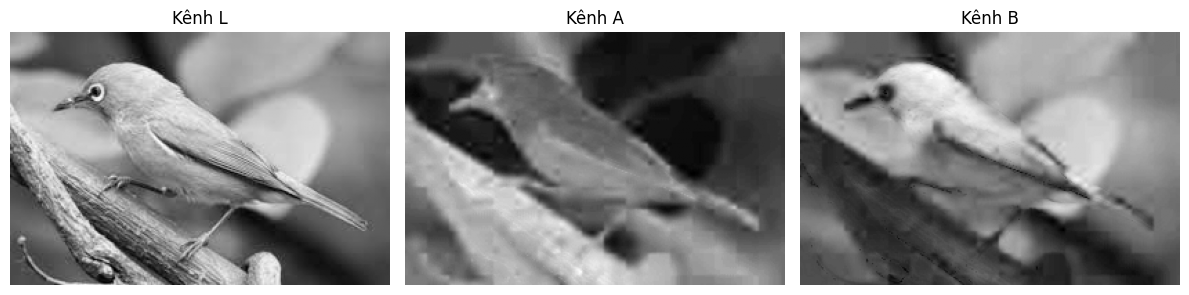

In [8]:
# Chuyển ảnh sang không gian màu LAB và tách riêng 3 kênh L, A, B, lưu thành ảnh grayscale tương ứng (`[ten_anh]_L.jpg`, `[ten_anh]_A.jpg`, `[ten_anh]_B.jpg`). (0.5 điểm)
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from skimage import color
import os

# Đọc ảnh gốc
filename = 'bird.jpg'
img = iio.imread(filename)

# Chuyển sang không gian màu LAB
lab = color.rgb2lab(img)

# Tách các kênh L, A, B
L = lab[:, :, 0]
A = lab[:, :, 1]
B = lab[:, :, 2]

# Đưa về ảnh grayscale uint8 để lưu
L_img = ((L / 100) * 255).astype(np.uint8)     # L có range 0-100
A_img = ((A + 128) / 255 * 255).astype(np.uint8)  # A có range khoảng [-128, 127]
B_img = ((B + 128) / 255 * 255).astype(np.uint8)  # B tương tự

# Tên file gốc không đuôi
basename = os.path.splitext(filename)[0]

# Lưu ảnh grayscale
iio.imsave(f"{basename}_L.jpg", L_img)
iio.imsave(f"{basename}_A.jpg", A_img)
iio.imsave(f"{basename}_B.jpg", B_img)

# Hiển thị
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(L_img, cmap='gray')
axs[0].set_title('Kênh L')

axs[1].imshow(A_img, cmap='gray')
axs[1].set_title('Kênh A')

axs[2].imshow(B_img, cmap='gray')
axs[2].set_title('Kênh B')

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()


### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật lọc và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Gaussian Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Median Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Bilateral Filter (tham số ngẫu nhiên) (0.5 điểm)  
* Canny Edge Detection (thresholds ngẫu nhiên 50–150) (0.5 điểm)  
* Erosion (kernel 2x2 đến 5x5 ngẫu nhiên) (0.5 điểm)  
* Dilation (tương tự Erosion) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* B: Gaussian Blur  
* M: Median Blur  
* F: Bilateral Filter  
* E: Canny Edge  
* R: Erosion  
* D: Dilation (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_blur_dog.jpg`, `result_canny_image2.jpg` (0.5 điểm)


Áp dụng Gaussian Blur với kernel: 3x3


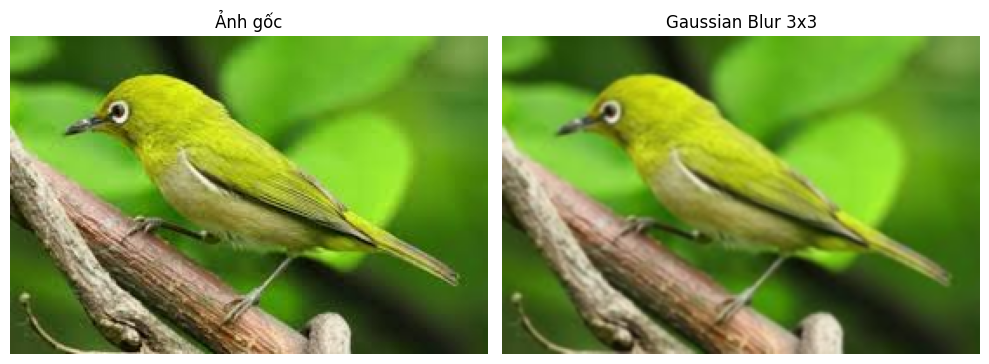

In [9]:
# 1 Gaussian Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import cv2
import random

# Đọc ảnh
filename = 'bird.jpg'
img = iio.imread(filename)

# Chọn kích thước kernel lẻ từ 3 đến 11
kernel_size = random.choice([3, 5, 7, 9, 11])
print(f"Áp dụng Gaussian Blur với kernel: {kernel_size}x{kernel_size}")

# Áp dụng Gaussian Blur
blurred = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

# Lưu ảnh
output_filename = f'bird_gaussian_blur_{kernel_size}x{kernel_size}.jpg'
iio.imsave(output_filename, blurred)

# Hiển thị so sánh
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(blurred)
plt.title(f"Gaussian Blur {kernel_size}x{kernel_size}")
plt.axis("off")

plt.tight_layout()
plt.show()



Median Blur với kernel: 9x9


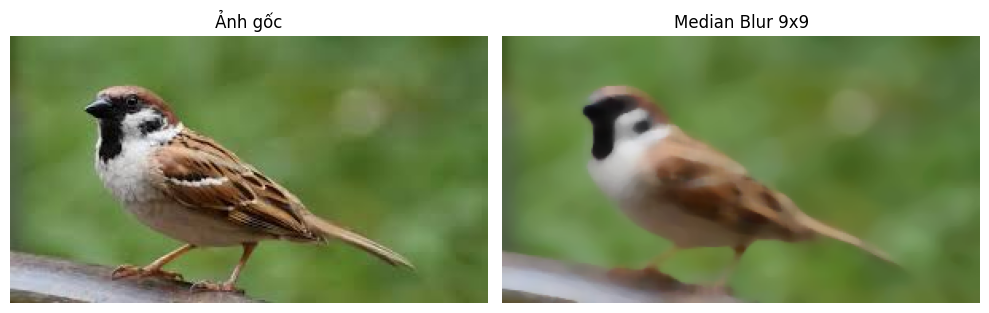

In [17]:
# 1 Median Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)
import cv2
import matplotlib.pyplot as plt
import random

# Đọc ảnh
img = cv2.imread('image2.jpg')

# Nếu ảnh grayscale → chuyển sang BGR
if len(img.shape) == 2:
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Kernel size ngẫu nhiên (phải là số lẻ)
kernel_size = random.choice([3, 5, 7, 9, 11])
print(f"Median Blur với kernel: {kernel_size}x{kernel_size}")

# Áp dụng Median Blur
blurred = cv2.medianBlur(img, kernel_size)

# Hiển thị ảnh gốc và ảnh lọc
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title(f"Median Blur {kernel_size}x{kernel_size}")
plt.axis("off")

plt.tight_layout()
plt.show()




Bilateral Filter với d=7, sigmaColor=124, sigmaSpace=101


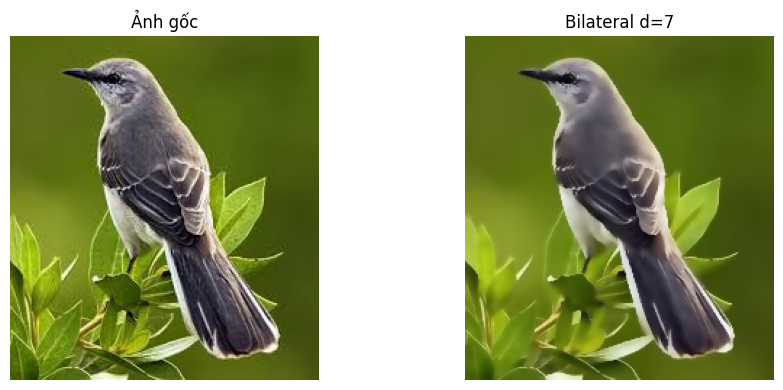

In [14]:
# 1 Bilateral Filter (tham số ngẫu nhiên)
import cv2
import matplotlib.pyplot as plt
import random

# Đọc ảnh
img = cv2.imread('image1.jpg')

# Nếu ảnh grayscale → chuyển sang BGR
if len(img.shape) == 2:
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Tham số ngẫu nhiên
d = random.choice([5, 7, 9])
sigmaColor = random.randint(50, 150)
sigmaSpace = random.randint(50, 150)

print(f"Bilateral Filter với d={d}, sigmaColor={sigmaColor}, sigmaSpace={sigmaSpace}")

# Áp dụng lọc
filtered = cv2.bilateralFilter(img, d, sigmaColor, sigmaSpace)

# Hiển thị ảnh gốc và ảnh lọc
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))
plt.title(f"Bilateral d={d}")
plt.axis("off")

plt.tight_layout()
plt.show()



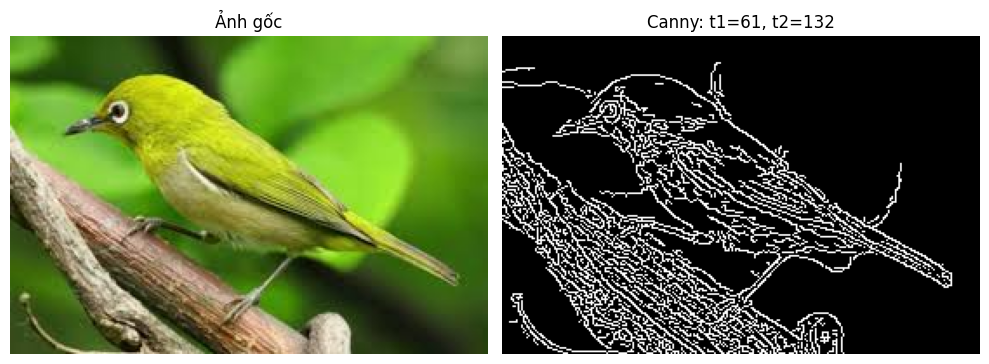

In [13]:
# 1 Canny Edge Detection (thresholds ngẫu nhiên 50–150)
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Đọc ảnh
img = cv2.imread('bird.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Chọn ngưỡng ngẫu nhiên
t1 = random.randint(50, 100)
t2 = random.randint(100, 150)

# Đảm bảo t1 < t2
if t1 > t2:
    t1, t2 = t2, t1

# Áp dụng Canny Edge Detection
edges = cv2.Canny(gray, t1, t2)

# Hiển thị ảnh gốc và kết quả
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title(f'Canny: t1={t1}, t2={t2}')
plt.axis("off")

plt.tight_layout()
plt.show()



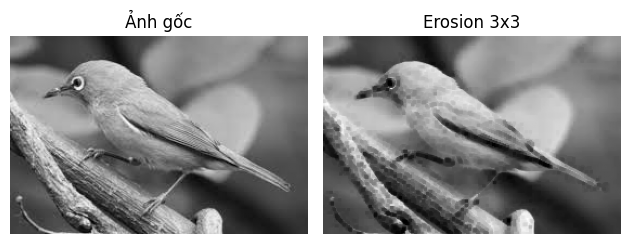

In [12]:
# 1 Erosion (kernel 2x2 đến 5x5 ngẫu nhiên)
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Đọc ảnh
img = cv2.imread('bird.jpg', cv2.IMREAD_GRAYSCALE)

# Tạo kernel ngẫu nhiên từ 2x2 đến 5x5
k = random.randint(2, 5)
kernel = np.ones((k, k), np.uint8)

# Áp dụng Erosion
eroded = cv2.erode(img, kernel, iterations=1)

# Hiển thị ảnh
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded, cmap='gray')
plt.title(f'Erosion {k}x{k}')
plt.axis('off')

plt.tight_layout()
plt.show()



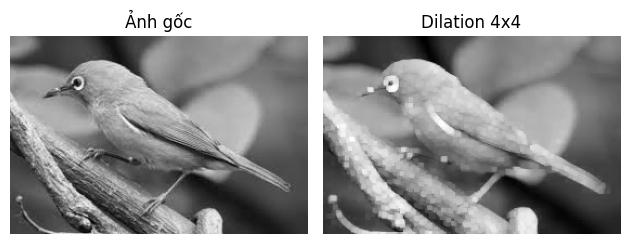

In [9]:
# 1 Dilation (tương tự Erosion)
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Đọc ảnh
img = cv2.imread('bird.jpg', cv2.IMREAD_GRAYSCALE)

# Tạo kernel ngẫu nhiên từ 2x2 đến 5x5
k = random.randint(2, 5)
kernel = np.ones((k, k), np.uint8)

# Áp dụng Dilation
dilated = cv2.dilate(img, kernel, iterations=1)

# Hiển thị ảnh
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated, cmap='gray')
plt.title(f'Dilation {k}x{k}')
plt.axis('off')

plt.tight_layout()
plt.show()



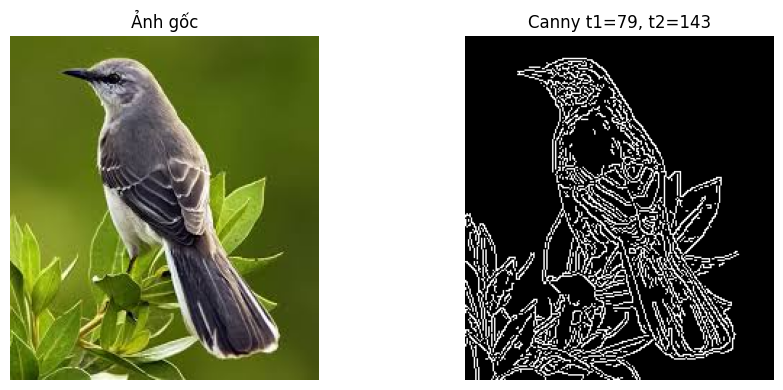

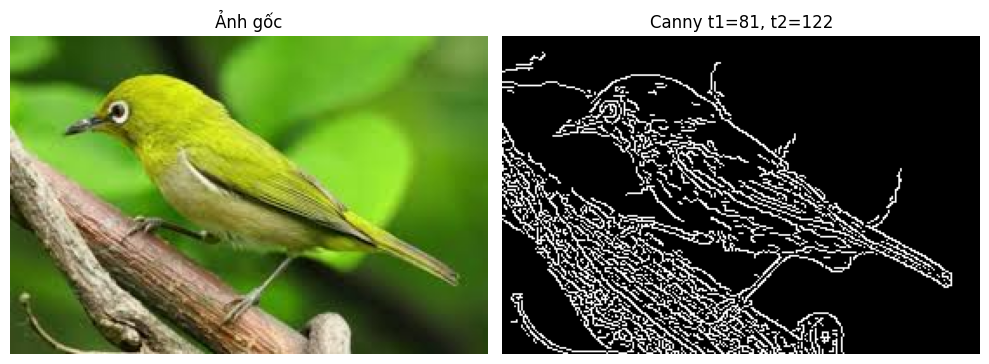

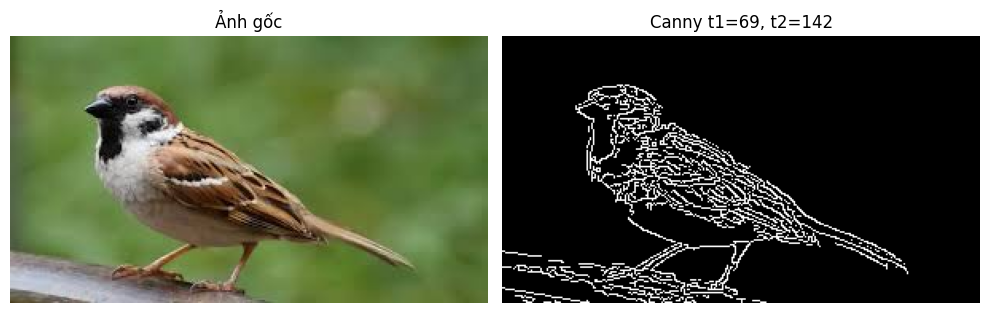

In [19]:
#2 Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý).
import cv2
import matplotlib.pyplot as plt
import random
import os

# Nhập tên 3 ảnh từ người dùng
image_list = []
for i in range(3):
    filename = input(f"Nhập tên ảnh thứ {i+1} (vd: image{i+1}.jpg): ")
    if os.path.exists(filename):
        image_list.append(filename)
    else:
        print(f"[!] Không tìm thấy ảnh: {filename}")

# Xử lý từng ảnh
for filename in image_list:
    # Đọc ảnh
    img = cv2.imread(filename)

    # Chuyển sang grayscale nếu cần
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img

    # Threshold ngẫu nhiên cho Canny
    t1 = random.randint(50, 100)
    t2 = random.randint(100, 150)
    if t1 > t2: t1, t2 = t2, t1

    # Áp dụng Canny
    edges = cv2.Canny(gray, t1, t2)

    # Hiển thị kết quả
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh gốc")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Canny t1={t1}, t2={t2}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


Phím chức năng:
 B - Gaussian Blur
 M - Median Blur
 F - Bilateral Filter
 E - Canny Edge Detection
 R - Erosion
 D - Dilation
 ESC - Thoát
→ Đã lưu: result_blur_bird.jpg


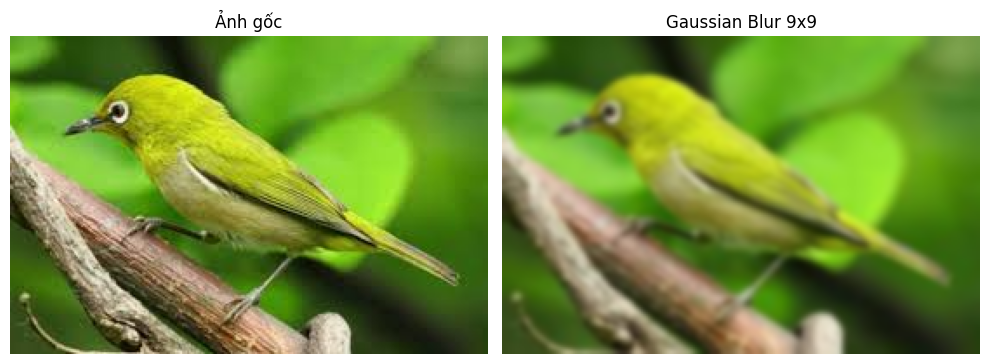

→ Đã lưu: result_bilateral_bird.jpg


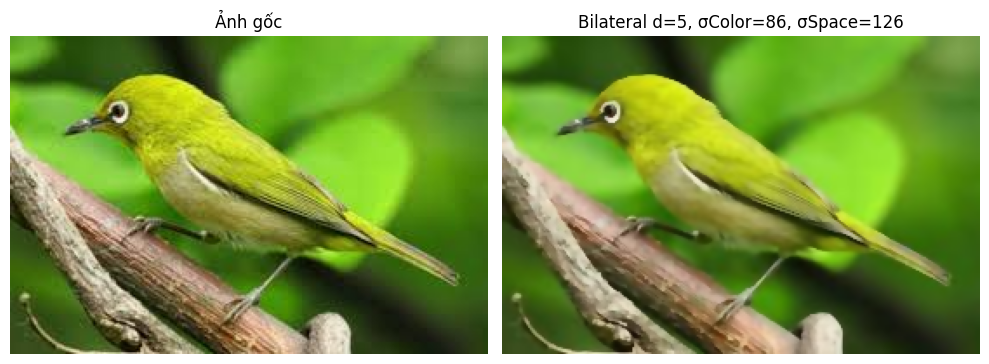

→ Đã lưu: result_dilation_bird.jpg


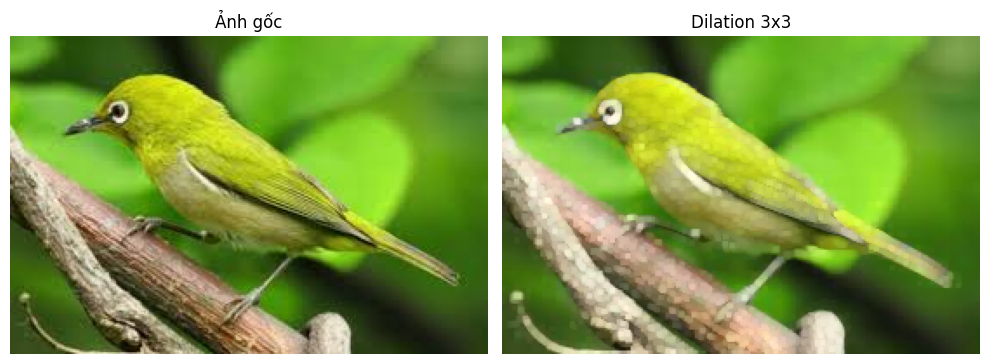

Thoát chương trình.


In [22]:
#3-4 Phím tương ứng để kích hoạt các phương pháp xử lý 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Đọc ảnh gốc
filename = 'bird.jpg'
img = cv2.imread(filename)

if img is None:
    print(f"[!] Không tìm thấy ảnh: {filename}")
    exit()

# Tách tên ảnh (không đuôi .jpg)
name, _ = os.path.splitext(os.path.basename(filename))

# Hiển thị hướng dẫn
print("Phím chức năng:")
print(" B - Gaussian Blur")
print(" M - Median Blur")
print(" F - Bilateral Filter")
print(" E - Canny Edge Detection")
print(" R - Erosion")
print(" D - Dilation")
print(" ESC - Thoát")

while True:
    key = input("Nhấn phím xử lý (B/M/F/E/R/D), hoặc ESC để thoát: ").lower()
    processed = None
    method = ""
    title = ""

    if key == 'b':
        k = random.choice([3, 5, 7, 9, 11])
        processed = cv2.GaussianBlur(img, (k, k), 0)
        method = "blur"
        title = f"Gaussian Blur {k}x{k}"

    elif key == 'm':
        k = random.choice([3, 5, 7, 9, 11])
        processed = cv2.medianBlur(img, k)
        method = "median"
        title = f"Median Blur {k}x{k}"

    elif key == 'f':
        d = random.choice([5, 7, 9])
        sigmaColor = random.randint(50, 150)
        sigmaSpace = random.randint(50, 150)
        processed = cv2.bilateralFilter(img, d, sigmaColor, sigmaSpace)
        method = "bilateral"
        title = f"Bilateral d={d}, σColor={sigmaColor}, σSpace={sigmaSpace}"

    elif key == 'e':
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        t1 = random.randint(50, 100)
        t2 = random.randint(100, 150)
        processed = cv2.Canny(gray, t1, t2)
        method = "canny"
        title = f"Canny Edge t1={t1}, t2={t2}"

    elif key == 'r':
        k = random.randint(2, 5)
        kernel = np.ones((k, k), np.uint8)
        processed = cv2.erode(img, kernel, iterations=1)
        method = "erosion"
        title = f"Erosion {k}x{k}"

    elif key == 'd':
        k = random.randint(2, 5)
        kernel = np.ones((k, k), np.uint8)
        processed = cv2.dilate(img, kernel, iterations=1)
        method = "dilation"
        title = f"Dilation {k}x{k}"

    elif key == 'esc':
        print("Thoát chương trình.")
        break

    else:
        print("Phím không hợp lệ.")
        continue

    # Đặt tên file kết quả
    result_filename = f"result_{method}_{name}.jpg"

    # Lưu ảnh kết quả
    if key == 'e':  # Canny: ảnh đơn kênh
        cv2.imwrite(result_filename, processed)
    else:
        cv2.imwrite(result_filename, processed)

    print(f"→ Đã lưu: {result_filename}")

    # Hiển thị ảnh bằng matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Ảnh gốc")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    if key == 'e':
        plt.imshow(processed, cmap='gray')
    else:
        processed_rgb = cv2.cvtColor(processed, cv2.COLOR_BGR2RGB)
        plt.imshow(processed_rgb)
    plt.title(title)
    plt.axis("off")

    plt.tight_layout()
    plt.show()




### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Tăng kích thước ảnh đầu tiên thêm 35 pixel ở mỗi cạnh. (0.5 điểm)  
* Xoay ảnh thứ hai 135 độ và lật ngang. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 5 lần và làm mịn bằng Gaussian blur kernel 9x9. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba bằng công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.5, 2.0], \quad \beta \in [-50, 50]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


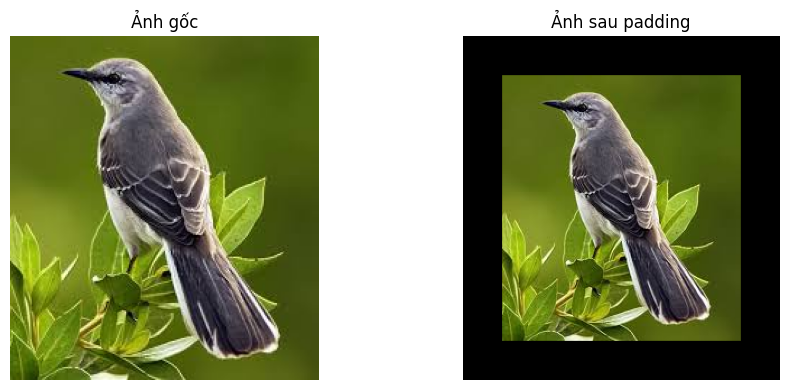

In [40]:
# Tăng kích thước ảnh đầu tiên thêm 35 pixel ở mỗi cạnh
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv2.imread('image1.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB để hiển thị đúng màu

# Padding 35 pixel mỗi cạnh (màu đen)
padded = cv2.copyMakeBorder(img, 35, 35, 35, 35, cv2.BORDER_CONSTANT, value=(0, 0, 0))
padded_rgb = cv2.cvtColor(padded, cv2.COLOR_BGR2RGB)

# Lưu ảnh
cv2.imwrite('result_padded_image1.jpg', padded)

# Hiển thị ảnh gốc và ảnh đã padding
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(padded_rgb)
plt.title("Ảnh sau padding")
plt.axis("off")

plt.tight_layout()
plt.show()




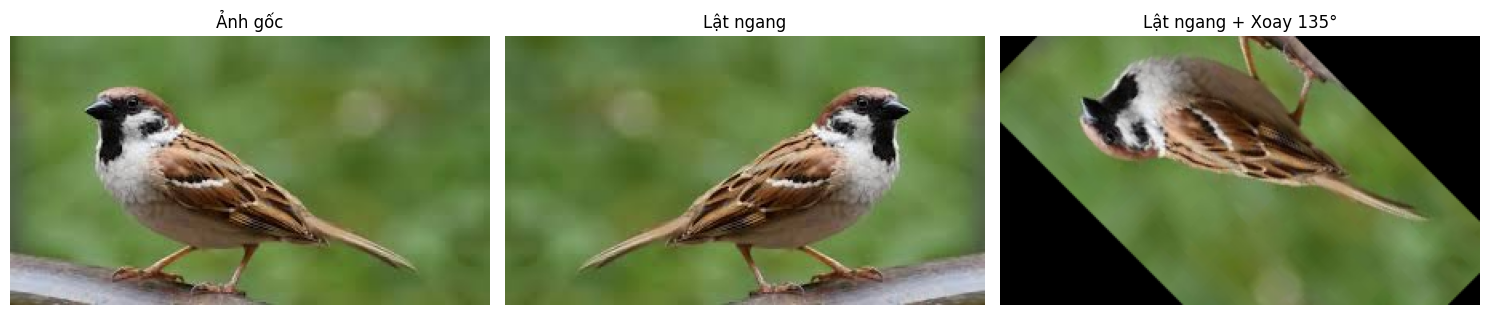

In [41]:
# Xoay ảnh thứ hai 135 độ và lật ngang.
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh thứ hai
img = cv2.imread('image2.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Lật ngang ảnh
flipped = cv2.flip(img, 1)

# Lấy kích thước ảnh
(h, w) = flipped.shape[:2]
center = (w // 2, h // 2)

# Tạo ma trận xoay 135 độ
M = cv2.getRotationMatrix2D(center, 135, 1.0)  # xoay 135 độ

# Áp dụng xoay
rotated = cv2.warpAffine(flipped, M, (w, h))

# Lưu ảnh kết quả
cv2.imwrite('result_rotate135_flip_image2.jpg', rotated)

# Chuyển ảnh sang RGB để hiển thị
flipped_rgb = cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB)
rotated_rgb = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh gốc, lật ngang và kết quả xoay
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(flipped_rgb)
plt.title("Lật ngang")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(rotated_rgb)
plt.title("Lật ngang + Xoay 135°")
plt.axis("off")

plt.tight_layout()
plt.show()


Ảnh gốc kích thước: (194, 260, 3)
Ảnh sau khi phóng to: (970, 1300, 3)


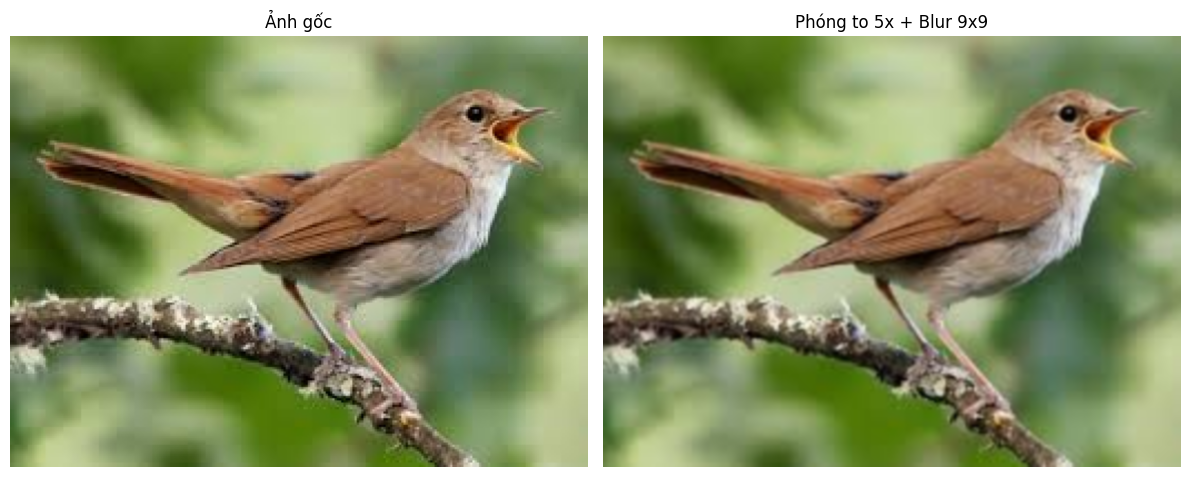

In [42]:
#tăng kích thước ảnh thứ ba lên 5 lần và làm mịn bằng Gaussian blur kernel 9x9.
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv2.imread('image3.jpg')
print("Ảnh gốc kích thước:", img.shape)

# Phóng to 5 lần
scaled = cv2.resize(img, None, fx=5.0, fy=5.0, interpolation=cv2.INTER_LINEAR)
print("Ảnh sau khi phóng to:", scaled.shape)

# Gaussian blur với kernel 9x9
blurred = cv2.GaussianBlur(scaled, (9, 9), 0)

# Lưu kết quả
cv2.imwrite('result_blur5x_image3.jpg', blurred)

# Hiển thị ảnh gốc và ảnh xử lý
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title("Phóng to 5x + Blur 9x9")
plt.axis("off")

plt.tight_layout()
plt.show()



Thay đổi độ sáng và tương phản với alpha = 1.13, beta = 37


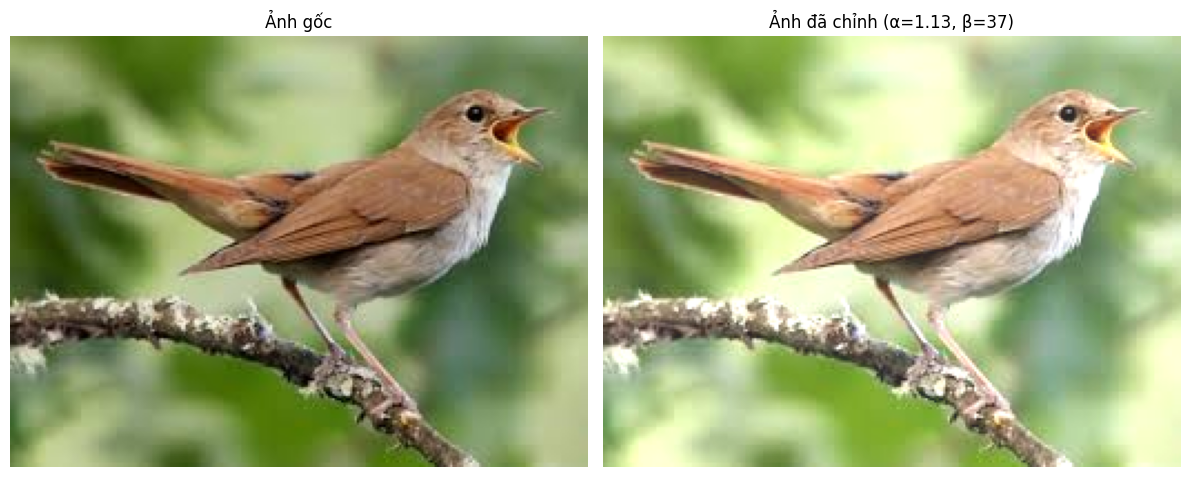

In [ ]:
# Thay đổi độ sáng và độ tương phản ảnh thứ ba
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Đọc ảnh thứ ba
img = cv2.imread('image3.jpg')

if img is None:
    print("[!] Không tìm thấy ảnh image3.jpg")
    exit()

# Sinh ngẫu nhiên giá trị alpha và beta theo yêu cầu
alpha = round(random.uniform(0.5, 2.0), 2)  # độ tương phản
beta = random.randint(-50, 50)             # độ sáng

print(f"Thay đổi độ sáng và tương phản với alpha = {alpha}, beta = {beta}")

# Áp dụng công thức: Iout(x, y) = clip(alpha * Iin(x, y) + beta, 0, 255)
adjusted = np.clip(alpha * img + beta, 0, 255).astype(np.uint8)

# Lưu ảnh kết quả
output_filename = 'result_brightness_contrast_image3.jpg'
cv2.imwrite(output_filename, adjusted)

# Hiển thị ảnh gốc và ảnh kết quả
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))
plt.title(f"Ảnh đã chỉnh (α={alpha}, β={beta})")
plt.axis("off")

plt.tight_layout()
plt.show()


# Chúc các bạn làm bài may mắn, hi vọng mọi người qua môn tất cả được 10.